Nr of cards: 4 nr of permutations: 24 deck entropy: 4.58
Entropy of deck: 4.585
Entropy of pulling one symbol from each permutation of deck
    0  1  2  3  dist  E_per_symbol
0   0  1  2  3   6.0      1.792481
1   0  1  3  2   7.0      1.950212
2   0  2  1  3   9.0      1.974938
3   0  2  3  1   5.0      1.921928
4   0  3  1  2   7.0      1.842371
5   0  3  2  1   8.0      1.905639
6   1  0  2  3   7.0      1.950212
7   1  0  3  2   8.0      1.905639
8   1  2  0  3   7.0      1.842371
9   1  2  3  0   4.0      1.500000
10  1  3  0  2   5.0      1.521928
11  1  3  2  0   7.0      1.950212
12  2  0  1  3   5.0      1.921928
13  2  0  3  1   7.0      1.842371
14  2  1  0  3   8.0      1.905639
15  2  1  3  0   5.0      1.521928
16  2  3  0  1   4.0      1.500000
17  2  3  1  0   5.0      1.921928
18  3  0  1  2   4.0      1.500000
19  3  0  2  1   5.0      1.521928
20  3  1  0  2   7.0      1.950212
21  3  1  2  0   3.0      1.584963
22  3  2  0  1   5.0      1.921928
23  3  2  1  0   6.0

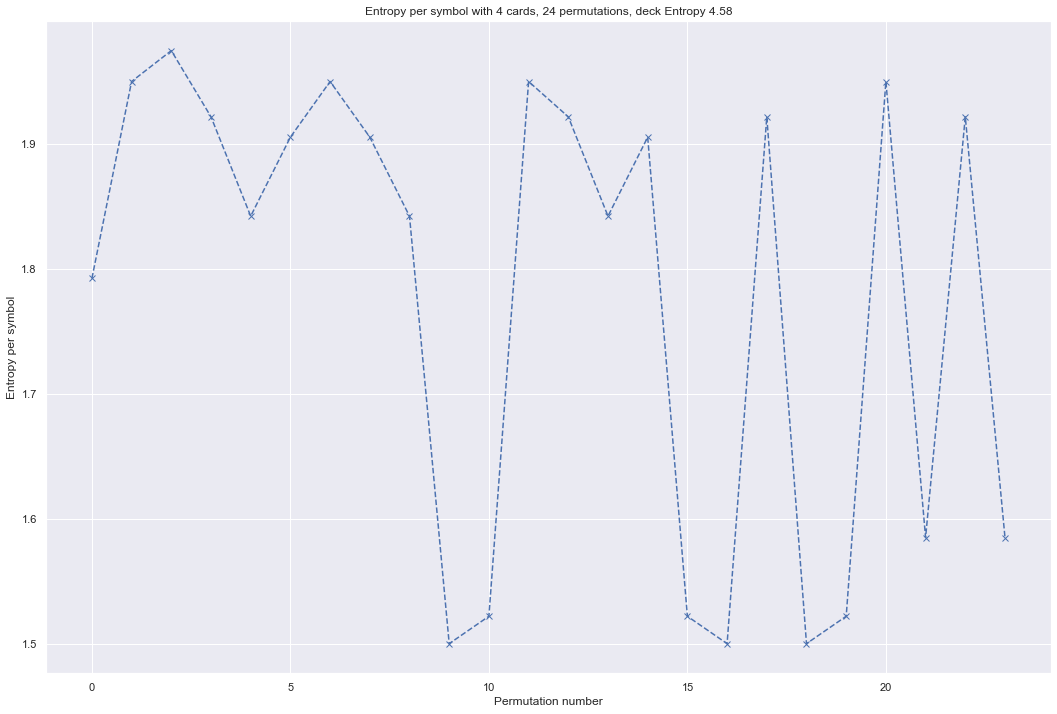

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from itertools import permutations
from itertools import combinations

from scipy.special import factorial

import pandas as pd

nr_cards = 4

nr_perm = factorial(nr_cards).astype(int)

deck_entropy = -sum(np.ones(nr_perm)/nr_perm * np.log2(np.ones(nr_perm)/nr_perm))

print('Nr of cards: {} nr of permutations: {} deck entropy: {:.2f}'.format(nr_cards,nr_perm,deck_entropy))

if nr_cards < 6:

    deck = np.arange(nr_cards).astype(int)

    perm = np.array(list(permutations(deck)))

    def e(p):
        E = 0
        for item in p:
            if item == 0:
                E += 0
            else:
                E += item * np.log2(item)
        #E = -sum(p * np.log2(p))
        return -E

    def dist(arr,norm=True):

        out = np.zeros_like(arr)

        for i in range(len(arr) - 1):
            out[i] = arr[i+1] - arr[i]

        out[-1] = arr[-1] - arr[0]

        for i in range(len(out)):
            if out[i] < 0:
                out[i] += nr_cards - 1
                
        if out.sum() == 0:
            return np.array([0])
        
        if norm:
            out = out / out.sum()

            return out 
        else:
            return out

    deck_p = np.ones(nr_perm) / nr_perm

    deck_e = e(deck_p)

    print('Entropy of deck: {:.3f}'.format(deck_e))

    if nr_cards < 6:
        dist_per_perm = np.zeros(len(perm))
        e_per_perm = np.zeros(len(perm))

        print ('Entropy of pulling one symbol from each permutation of deck')
        for i,d in enumerate(perm):
            #print(d,dist(d,False),dist(d,False).sum(),e(dist(d)))
            dist_per_perm[i] = dist(d,False).sum()
            e_per_perm[i] = e(dist(d))

        df = pd.DataFrame.from_records(perm)
        df['dist'] = dist_per_perm
        df['E_per_symbol'] = e_per_perm
        print (df.head(60))
        
    df['E_per_symbol'].plot(style='x--',figsize=(18,12))
    plt.title('Entropy per symbol with {} cards, {} permutations, deck Entropy {:.2f}'.format(nr_cards,nr_perm,deck_e))
    plt.ylabel('Entropy per symbol')
    plt.xlabel('Permutation number')